In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [20]:
df = pd.read_csv('cancer.csv')
df.dropna()
df = df.drop('class', axis = 1)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [21]:
sc = StandardScaler()
df_scaled = sc.fit_transform(df)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm)
pca = PCA(n_components = 2)
df_prp = pca.fit_transform(df_norm)
df_prp = pd.DataFrame(df_prp)
df_prp.columns = ['X', 'Y']

In [32]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df_prp.X, df_prp.Y, test_size=0.01)
x_train, x_test, y_train, y_test = train_test_split(df.radius_mean, df.texture_mean, test_size=0.01)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
# classsifier = classifier.fit(df.radius_mean, df.texture_mean)

ValueError: Expected 2D array, got 1D array instead:
array=[14.22  16.26  28.11  17.19  16.24  10.03  14.81  13.88  13.17  13.85
 17.85  12.67  15.13   9.173 14.99   7.76  11.84  12.87   9.742 11.16
 11.6   15.49  15.08  11.71  18.66  21.16  12.18  12.75  11.9   17.27
 19.4   12.88  13.87  12.83  13.61  10.8   11.34  11.74  15.75   8.571
 13.53   8.618 12.    17.08  10.94  13.65  17.99  14.99  13.64  20.29
 10.48  12.87  20.48  14.26  14.76  11.54   9.755 11.25  11.27  12.06
 12.89  11.52  14.97  14.06  12.27   7.691  9.876 13.44  19.81  18.31
 19.44  10.65  14.27  13.    12.63  17.47  21.75   9.    12.77  11.46
 14.05  13.4   11.99  19.17   8.597 19.53  12.7   20.59  19.55  14.48
 14.04  25.22  11.67  14.11  14.64  10.8   19.53  20.47  14.6   11.8
 14.92   8.219 20.34  14.71  16.65  12.47  13.81  15.32  11.14  14.29
 20.6   14.96  13.24  20.26  10.86  14.8    9.606 12.62  10.6   12.85
 10.29  14.58  11.5   23.09  12.19  27.22  18.08  13.54  13.45  11.7
 12.3   20.18  10.82  16.27  16.25  11.81  19.4   11.22  12.54  11.57
 24.63   9.683 14.69  19.89   9.742 15.3   13.17  11.76  12.94  12.05
 12.58  17.54  15.75  13.77  14.42   8.671 14.44  16.46  13.2   15.71
 12.43  19.68  15.5   12.23  11.04  13.77  12.72  12.95  10.17  15.46
 13.14   8.598 14.87  17.91  11.85  16.84   9.465 10.25  11.06  11.26
 11.49  10.66  14.4   13.    16.17  12.89  11.89  16.3   10.08  18.61
 18.49   9.029 13.28  18.82   9.738  9.876 12.62  13.51  13.73  21.56
 13.27  12.1   14.22   9.777 13.64  14.87  20.94  11.3   13.62  12.76
 11.04  12.99   8.726 13.4   12.25  11.93  23.27  13.9   16.16  17.02
 11.93  17.2   18.77  15.78  14.54  14.53  20.51  13.2   13.98  13.8
 16.11   9.847 16.6    9.504 11.95  12.06   9.668 11.26  12.46  13.46
 15.46  21.71  11.71  11.75  14.64  15.61  20.16  19.02  24.25  15.73
 21.1    8.196 16.74  22.01  13.94  23.51  19.73  12.    13.59  14.95
 12.72  13.66  23.29  13.01  13.28  12.83  13.05  13.68  27.42  12.3
 11.45  19.79  14.59  13.    11.62  17.3   17.35  11.6   12.46  12.54
 25.73  19.1   11.8   19.19  13.34  10.95  11.89  13.38  12.47  11.52
  9.436 10.2   10.05  16.07   9.397 10.51  17.75  15.53  18.22  12.32
 12.56  15.19  17.01  13.86  11.71  10.32  13.15  19.16  15.28  11.89
  9.676 14.41  11.06  10.16  11.41  12.88  12.39  19.07  12.27  17.6
 13.96  12.42  11.22  20.92   7.729 11.15  17.29  12.86  10.57  12.86
 13.78  14.25  18.46  12.98  11.36  15.37  11.41  10.88  13.27  12.04
 10.96  21.09  11.43  13.85  11.06  15.1   14.68  15.12  14.58  11.6
 13.5   12.4   14.86  18.25  12.45  12.34  15.22  13.56  12.89  23.21
 12.81  13.03  13.21  15.04  12.25  12.07  10.18  18.03  19.8   17.06
 10.26  12.22  15.34  14.62  12.9    9.333  9.042 21.37  15.06  15.46
 11.08  13.21  13.11  22.27  15.7   13.11  15.1   12.03  18.94   8.888
 20.55  11.08  18.81  13.61  18.05  12.8   13.59  11.33  10.91  14.5
 10.26  14.95  12.77  14.42  16.13  16.5   17.14  13.3   13.16  20.73
 20.58  12.16  20.31  17.99  21.61  11.63   9.405 12.78  17.57  16.13
 14.53  20.13  13.43  11.94   9.423 11.54   8.95  11.66  13.08  11.37
 19.21  11.29  12.36  12.34   9.295 12.36  14.86  18.63  12.2   13.37
 19.    14.19  10.26  18.65  12.77  13.82  13.05  20.09  19.59  18.31
 19.18  12.21  11.74  12.65  10.49  11.13  17.05  14.25  13.71  18.45
 11.87  13.7   13.87  13.9   15.85  12.76  15.66   9.72  15.78  18.01
 10.97  16.14  13.05  13.85   9.904 12.49  16.02  17.42  11.61  13.48
 10.71  10.51  11.28  14.03  16.69  11.47  16.03  20.2   12.18  10.57
 19.27   9.731 11.13  14.9   14.47  20.64  12.05  11.94  14.97  13.17
  8.734  6.981 14.02  13.74  13.46  11.69  10.48   9.787 19.59  13.66
 14.26   9.567 12.18  13.75  17.46  16.78  10.75  11.27  20.57  10.49
 12.34  12.45  11.31  12.91  14.74  19.55  12.34  13.49  14.2   13.71
 13.47  12.96  12.46  14.61  13.69  17.68  12.68  14.34  11.32  15.05
 19.69  11.2   14.78  11.76  15.27  20.44  11.42  17.95  11.84   9.268
 12.31  17.93  20.18  10.9   11.75  18.22  10.44  14.45   9.667 11.34
 11.51  19.45  11.64 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

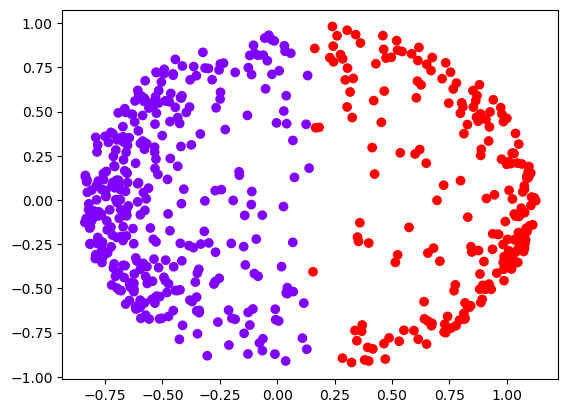

In [ ]:
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans2.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

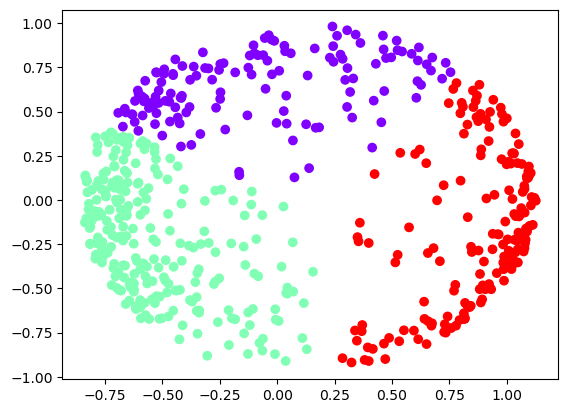

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=100) 
kmeans3.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans3.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

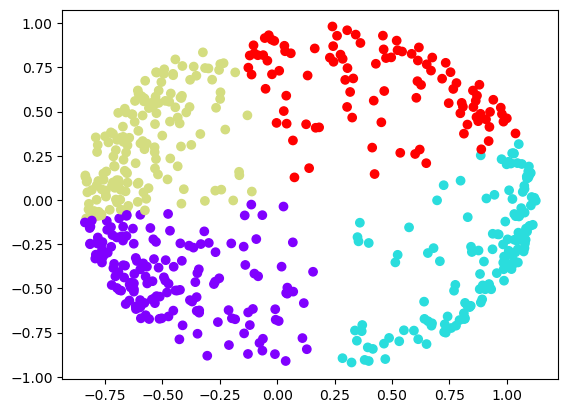

In [ ]:
kmeans4 = KMeans(n_clusters=4, random_state=100) 
kmeans4.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans4.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

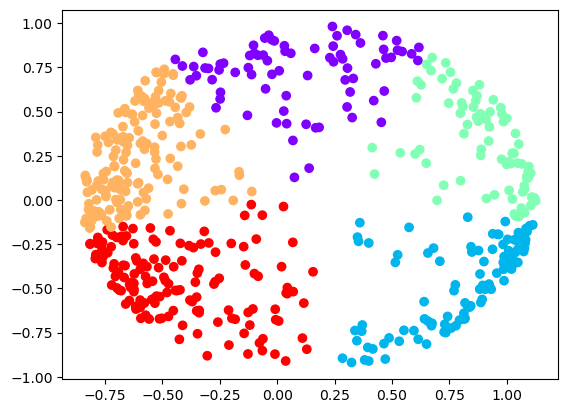

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=100) 
kmeans5.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans5.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

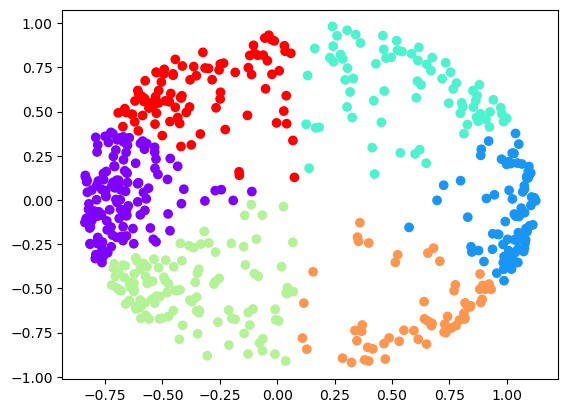

In [ ]:
kmeans6 = KMeans(n_clusters=6, random_state=100) 
kmeans6.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans6.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

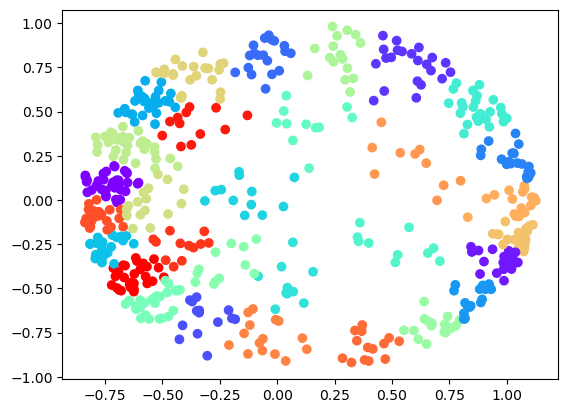

In [ ]:
kmeans30 = KMeans(n_clusters=30, random_state=100) 
kmeans30.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans30.fit_predict(df_prp), cmap = 'rainbow')
plt.show()

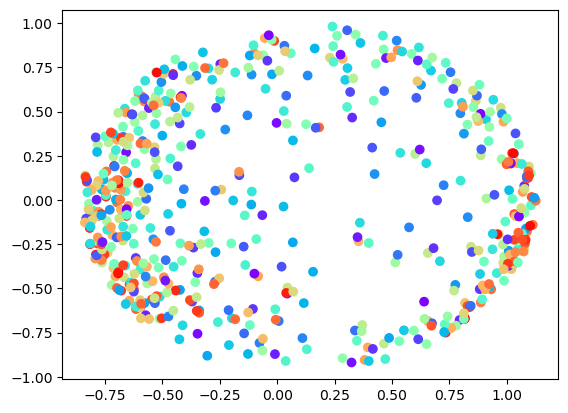

In [ ]:
kmeans569 = KMeans(n_clusters=569, random_state=100) 
kmeans3.fit(df)
plt.scatter(df_prp['X'], df_prp['Y'], c = kmeans569.fit_predict(df_prp), cmap = 'rainbow')
plt.show()